### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

urls = [url, url2, url3, url4]

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
#Calculando o valor total das vendas por loja:
faturamento_totalloja1 = loja['Preço'].sum()
faturamento_totall2= loja2['Preço'].sum()
faturamento_totall3 = loja3['Preço'].sum()
faturamento_totall4 = loja4['Preço'].sum()

#Somando o faturamento das 4 lojas:

faturamento_total_de_todas_as_lojas = faturamento_totalloja1 + faturamento_totall2 + faturamento_totall3 + faturamento_totall4

#Mostrando os resultados:
print (f"O faturamento da loja 1 é : R$ {faturamento_totalloja1}")
print (f"O faturamento da loja 2 é : R$ {faturamento_totall2}")
print (f"O faturamento da loja 3 é : R$ {faturamento_totall3}")
print (f"O faturamento da loja 4 é : R$ {faturamento_totall4}")
print (f"\nO faturamento total de todas as lojas é: R$ {faturamento_total_de_todas_as_lojas}")


O faturamento da loja 1 é : R$ 1534509.12
O faturamento da loja 2 é : R$ 1488459.06
O faturamento da loja 3 é : R$ 1464025.03
O faturamento da loja 4 é : R$ 1384497.58

O faturamento total de todas as lojas é: R$ 5871490.79


# 2. Vendas por Categoria


Para um detalhamento maior, calculamos a quantidade de produtos vendidos por loja:

In [ ]:
quant_produtos_vendidosloja1 = len(loja['Produto'])
quant_produtos_vendidosloja2 = len(loja2['Produto'])
quant_produtos_vendidosloja3 = len(loja3['Produto'])
quant_produtos_vendidosloja4 = len(loja4['Produto'])


print (f"A quantidade de Produtos vendidos pela loja 1 é : {quant_produtos_vendidosloja1}")
print (f"A quantidade de Produtos vendidos pela loja 2 é :  {quant_produtos_vendidosloja2}")
print (f"A quantidade de Produtos vendidos pela loja 3 é : {quant_produtos_vendidosloja3}")
print (f"A quantidade de Produtos vendidos pela loja 4 é :  {quant_produtos_vendidosloja4}")

A quantidade de Produtos vendidos pela loja 1 é : 2359
A quantidade de Produtos vendidos pela loja 2 é :  2359
A quantidade de Produtos vendidos pela loja 3 é : 2359
A quantidade de Produtos vendidos pela loja 4 é :  2358


Observem, que, a quantidade de produtos vendidos refere-se uma **quantidade de produtos existentes na loja que foram vendidos** , mesmo que apenas uma vez ou várias vezes.

Agora, calculamos e exibiremos as vendas por categoria de cada loja:


In [ ]:
def produtos_vendidos_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()

    print(f"\nQuantidade de produtos vendidos por categoria na Loja {numero}:")

    print(vendas)


produtos_vendidos_por_categoria(loja,  1)
produtos_vendidos_por_categoria(loja2, 2)
produtos_vendidos_por_categoria(loja3, 3)
produtos_vendidos_por_categoria(loja4, 4)




Quantidade de produtos vendidos por categoria na Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Quantidade de produtos vendidos por categoria na Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Quantidade de produtos vendidos por categoria na Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrum

# 3. Média de Avaliação das Lojas

In [ ]:
def media_avaliacao_loja(loja, numero):
  media_avaliacao = loja['Avaliação da compra'].mean()
  print(f"A média de avaliação da Loja {numero} é: {media_avaliacao:.3f}")

media_avaliacao_loja(loja, 1)
media_avaliacao_loja(loja2, 2)
media_avaliacao_loja(loja3, 3)
media_avaliacao_loja(loja4, 4)


A média de avaliação da Loja 1 é: 3.977
A média de avaliação da Loja 2 é: 4.037
A média de avaliação da Loja 3 é: 4.048
A média de avaliação da Loja 4 é: 3.996


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd

df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)
df_total['Receita'] = df_total['Preço']
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

def produtos_vendidos(loja):
    dados = vendas[vendas['Loja'] == loja]
    produtos_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(5)
    produtos_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(5)

    print(f"\n{loja} - PRODUTOS QUE MAIS VENDERAM COM MAIOR FATURAMENTO:")
    for _, linha in produtos_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - PRODUTOS QUE MENOS VENDERAM COM MENOR FATURAMENTO:")
    for _, linha in produtos_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

por_lojas = vendas['Loja'].unique()

# Mostrando resultados para cada loja:
for loja in por_lojas:
    produtos_vendidos(loja)



Loja 1 - PRODUTOS QUE MAIS VENDERAM COM MAIOR FATURAMENTO:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40
  Smart TV - Receita: R$89936.15
  Lavadora de roupas - Receita: R$87711.30

Loja 1 - PRODUTOS QUE MENOS VENDERAM COM MENOR FATURAMENTO:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27
  Jogo de copos - Receita: R$1812.15
  Xadrez de madeira - Receita: R$1907.42

Loja 2 - PRODUTOS QUE MAIS VENDERAM COM MAIOR FATURAMENTO:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48
  Lavadora de roupas - Receita: R$89016.81
  Smart TV - Receita: R$81522.94

Loja 2 - PRODUTOS QUE MENOS VENDERAM COM MENOR FATURAMENTO:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54
  Xadrez de madeira - Receita: R$1717.05
  Jogo de copos - Receita: R$

# 5. Frete Médio por Loja


In [ ]:
df_total['Frete']= df_total['Frete'].astype(float)
frete_medio= df_total.groupby('Loja')['Frete'].mean()

for loja, medio in frete_medio.items():

 print(f"\nO Frete Médio da {loja}: é R${medio:.3f}")



O Frete Médio da Loja 1: é R$34.692

O Frete Médio da Loja 2: é R$33.622

O Frete Médio da Loja 3: é R$33.074

O Frete Médio da Loja 4: é R$31.279


Repare que, primeiro precisamos assegurar que a coluna 'Frete' seja do tipo numérico e, logo depois, agrupar-la por loja para calcular o frete médio.



#6. Gráficos



**Análise do Faturamento total das lojas:**

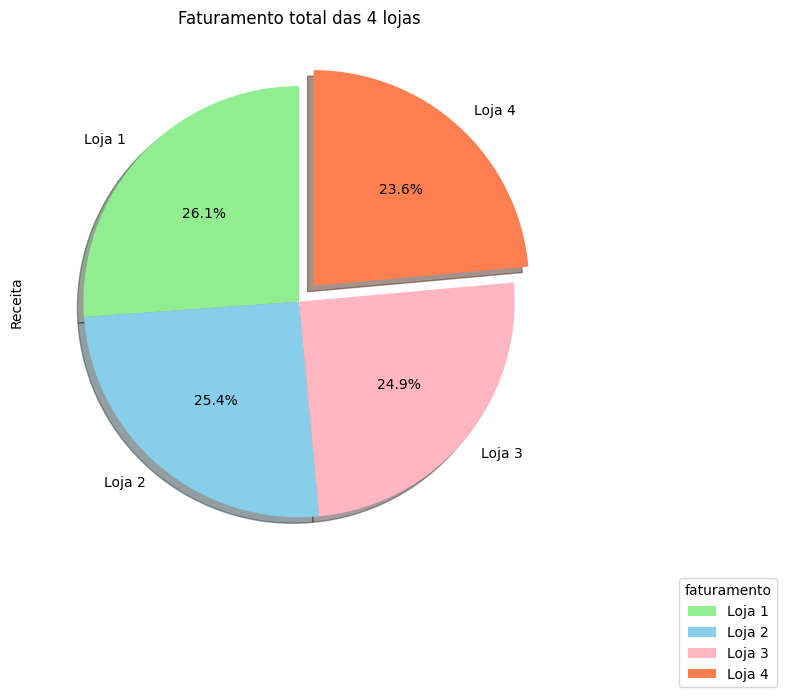

In [ ]:
import matplotlib.pyplot as plt

df_total['Preço'] = df_total['Preço'].astype(float)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Receita'] = df_total['Preço']

receitas_totais = df_total.groupby('Loja')['Receita'].sum()
redeitas_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_das_receitas = receitas_totais

#GRÁFICO DE PIZZA/SETOR:
explode = [0, 0, 0, 0.1]
cores = ['lightgreen', 'skyblue', 'lightpink', 'coral']
fig= plt.figure(figsize=(10,7))
distribuicao_das_receitas.plot (kind='pie',
                               autopct = '%1.1f%%',
                               explode=explode,
                               shadow=True,
                               startangle=90,
                               colors=cores)

plt.legend( title="faturamento", loc="upper right", bbox_to_anchor=(1.4,0))
plt.title("Faturamento total das 4 lojas")
plt.show()

**Análise Comparativa de Vendas entre Lojas:**


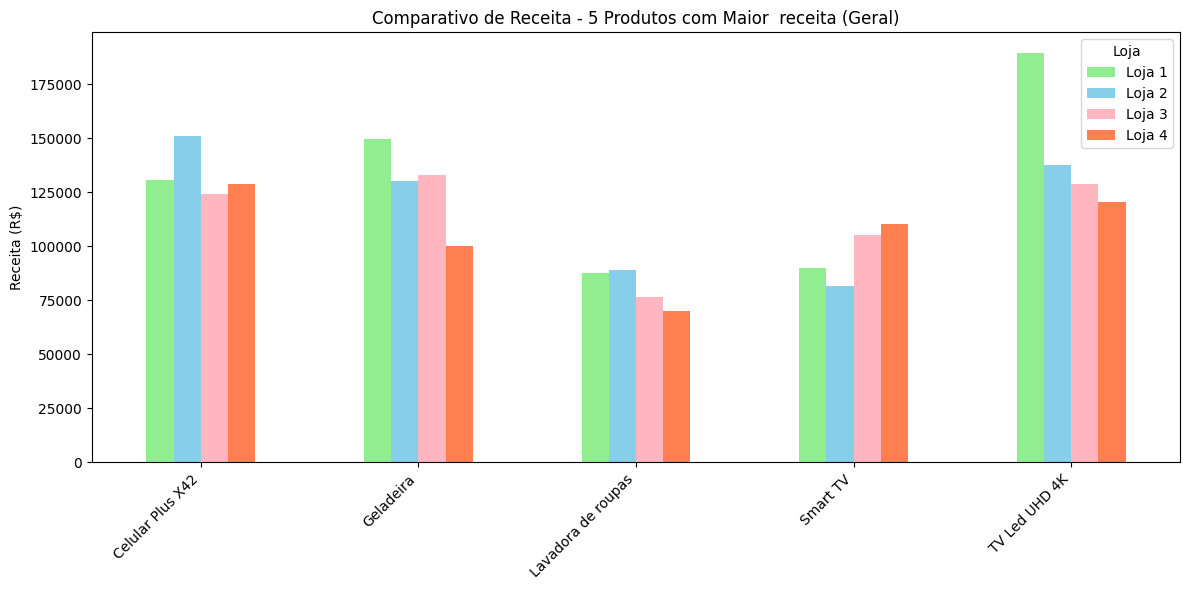

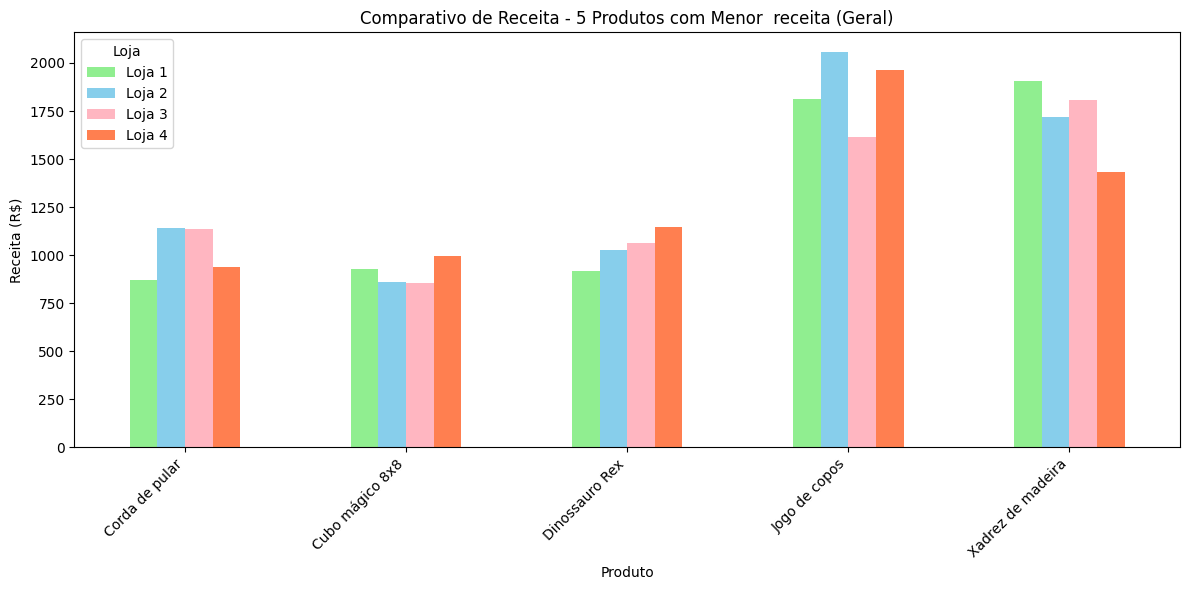

In [ ]:

#GRÁFICO DE BARRA VERTICAL:
def plotar_comparativo_geral (vendas_df):
  vendas_gerais = vendas_df.groupby('Produto')['Receita'].sum()
  produtos_vendidos_nomes = vendas_gerais.nlargest(5).index
  bottom_produtos_nomes = vendas_gerais.nsmallest(5).index

  dados_plot_top = vendas_df[vendas_df['Produto'].isin(produtos_vendidos_nomes)].pivot(
    index='Produto', columns='Loja', values='Receita').fillna(0)
  dados_plot_bottom = vendas_df[vendas_df['Produto'].isin(bottom_produtos_nomes)].pivot(
    index='Produto', columns='Loja', values='Receita').fillna(0)

 #COMEÇANDO A CRIAÇÃO DOS GRÁFICOS

 #GRÁFICOS DE BARRAS COM OS 5 PRODUTOS MAIS VENDIDOS:
  cores=['lightgreen', 'skyblue', 'lightpink', 'coral']
  dados_plot_top.plot(kind='bar', figsize=(12, 6), color=cores)
  plt.title("Comparativo de Receita - 5 Produtos com Maior  receita (Geral)")
  plt.ylabel("Receita (R$)")
  plt.xlabel ('')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

 #GRÁFICOS DE BARRAS COM OS 5 PRODUTOS MENOS VENDIDOS:
  cores=['lightgreen', 'skyblue', 'lightpink', 'coral']
  dados_plot_bottom.plot(kind='bar', figsize=(12, 6),  color=cores)
  plt.title("Comparativo de Receita - 5 Produtos com Menor  receita (Geral)")
  plt.ylabel("Receita (R$)")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


plotar_comparativo_geral(vendas)

**Análise das Médias das Avaliações das vendas por loja:**

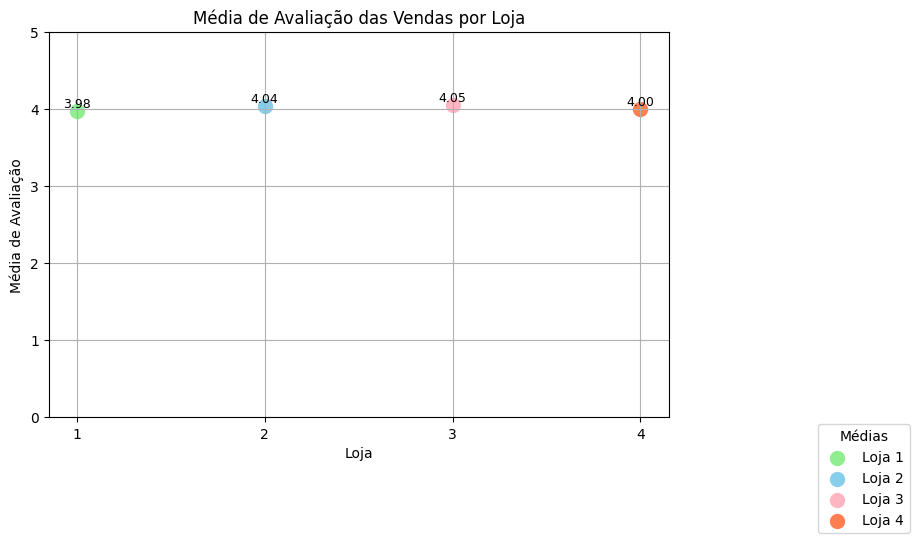

In [ ]:
import matplotlib.pyplot as plt

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)
df_total['Receita'] = df_total['Preço']

receitas_totais = df_total.groupby('Loja')['Receita'].sum()
redeitas_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_das_receitas = receitas_totais

# Calculando novavemnte as médias e colocando em listas:
media_avaliacoes_por_loja = df_total.groupby('Loja')['Avaliação da compra'].mean()
lojas = media_avaliacoes_por_loja.index.str.replace('Loja ', '').astype(int).tolist()
medias = media_avaliacoes_por_loja.values.tolist()

# GRÁFICO DE DISPERSÃO:
cores = ['lightgreen', 'skyblue', 'lightpink', 'coral']
plt.figure(figsize=(8, 5))
plt.title('Média de Avaliação das Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.xticks(lojas)
plt.ylim(0, 5)

#Adicionando cada loja com sua respectiva cor na legenda:
for i, loja_num in enumerate(lojas):
    plt.scatter(loja_num, medias[i], color=cores[i], s=100, label=f'Loja {loja_num}')
    plt.legend(title="Médias", loc="upper right", bbox_to_anchor=(1.4, 0))

# Mostrando e exibindo os dados das médias no gráfico:
for i, media in enumerate(medias):
    plt.text(lojas[i], media + 0.05, f'{media:.2f}', ha='center', fontsize=9)

plt.grid(True)
plt.show()

#7. Relatório

  Analisando os dados acima, percebe-se que, as lojas sofrem variações nas suas vendas. Com isso, se observamos apenas os gráficos teremos uma boa ideia de qual loja o Sr. João deverá vender.
  


No primeiro gráfico, interpretamos a diferença dos faturamentos, ou seja, das Receitas de cada loja. Repare, que, a Loja 1 contém a maior porcentagem seguido pela Loja 2, Loja 3 e a Loja 4 (com a menor porcentagem). Se observarmos sua variação, teremos uma variação mínima de 1,99% entre as Lojas 2 e 3 e uma variação máxima de 10,06% entre as Lojas 1 e 4.
No segundo e terceiro gráfico, temos as variações dos produtos mais e menos vendidos pelas 4 lojas. Nos produtos com maior receita mostra que, a Loja 4 sofre declínio na maioria dos produtos, enquanto nos produtos com menor receita ela sofre um aumento maior em relaçao as outras lojas.
No quarto gráfico, percebemos que a Loja 1 contém menor média de avaliações de vendas enquanto que a Loja 3 contém uma média maior.

Então,

- Se o critério for faturamento → a loja com menor receita total é a de pior desempenho (Loja4).

- Se o critério for avaliação → a loja com menor média de notas é a de pior percepção pelo cliente (Loja 1).

- Se quisermos uma visão geral de desempenho → a pior loja é aquela que combina baixo faturamento, poucas vendas e baixa avaliação.

Contudo, como Sr. João quer vender a loja com menor desempenho, independente de qual setor focar, então podemos afirmar, que, a Loja 4, mesmo com suas altas variações de vendas e avaliações, seria a mais apropriada. Claro que, não analisamos  certos atributos, como de atendimento e funcionamento, apenas fizemos um comparativo entre o que entra e saí das lojas de forma quantitativa.

Novamente afirmo que, caso precise de mais certeza, o Sr. João deverá repassar todos os dados referente a todos os setores e movimentos das lojas, analisando tanto os dados quantitativos e qualitativos.

**Realçando o resultado final, Sr. João deverá vender a LOJA 4.**